# Dataset 1 Forest fires

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
forestfires = pd.read_csv(r"C:\Users\91739\Downloads\forestfires.csv")

In [3]:
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data = forestfires.describe()

In [5]:
##Dropping the month and day columns
forestfires.drop(["month","day"],axis=1,inplace =True)

In [6]:
forestfires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [8]:
predictors

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
target

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [10]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
fires = norm_func(predictors)

In [12]:
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


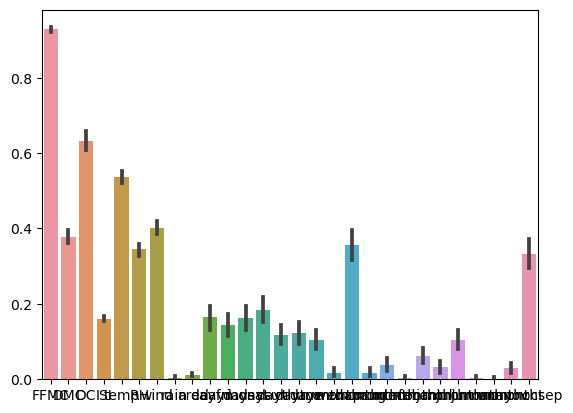

<Figure size 2000x800 with 0 Axes>

In [76]:
sns.barplot(fires)
plt.figure(figsize=((20,8)))
plt.show()

As we could see from the above barplot, FFMC has have highest records and Rain have lowest data points.
Also, the minimum and maximum fires happened in the particular months.

In [13]:
fires.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


<Axes: >

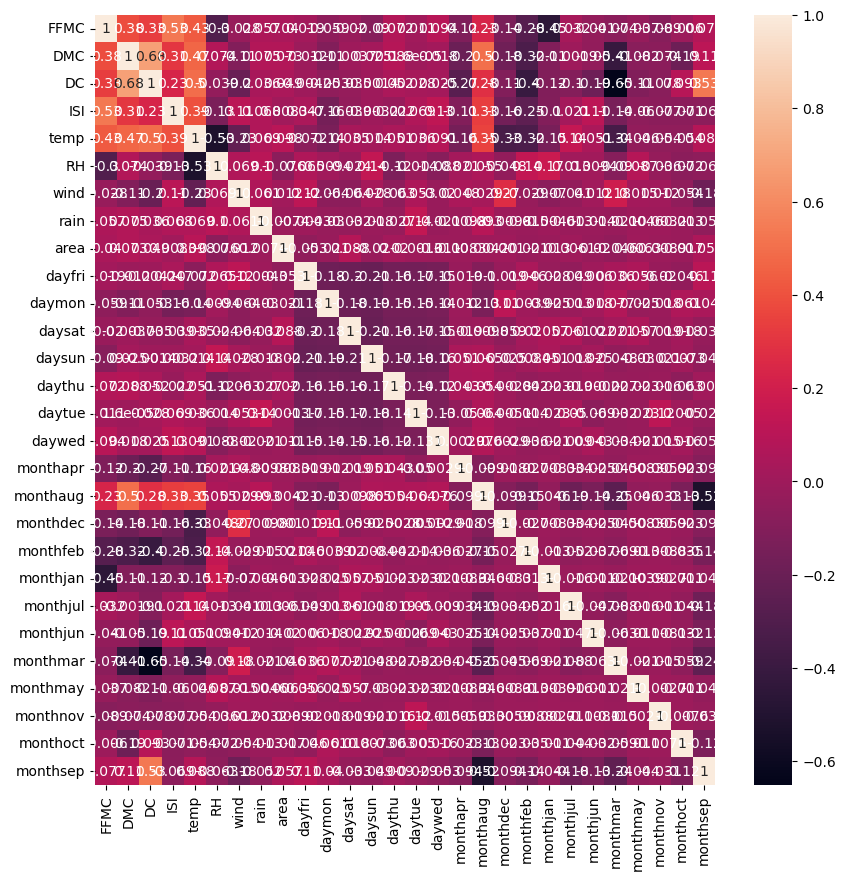

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(fires.corr(),annot=True)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((387, 28), (387,), (130, 28), (130,))

In [17]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [18]:
pred_test_linear = model_linear.predict(x_test)

In [19]:
np.mean(pred_test_linear==y_test) # Accuracy = 98.46%

1.0

In [20]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 100.0


array([[35,  0],
       [ 0, 95]], dtype=int64)

**Applying different kernels Poly, rbf, Sigmoid**

In [21]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [22]:
pred_test_poly = model_poly.predict(x_test)

In [23]:
np.mean(pred_test_poly==y_test)

0.7846153846153846

In [24]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [25]:
pred_test_rbf = model_rbf.predict(x_test)

In [26]:
np.mean(pred_test_rbf==y_test) #Accuracy = 76.15%

0.7615384615384615

In [27]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [28]:
pred_test_sig = model_rbf.predict(x_test)

In [29]:
np.mean(pred_test_sig==y_test)

0.7615384615384615

# Dataset Salary

In [30]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [31]:
#importing the datasets

train=pd.read_csv(r"C:\Users\91739\Downloads\SalaryData_Train.csv")
test=pd.read_csv(r"C:\Users\91739\Downloads\SalaryData_Test.csv")

In [32]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [33]:
train.shape

(30161, 14)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [35]:
test.shape

(15060, 14)

In [36]:
train=train.apply(LabelEncoder().fit_transform)
test=test.apply(LabelEncoder().fit_transform)

In [37]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [38]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


# Visualization

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

<Axes: >

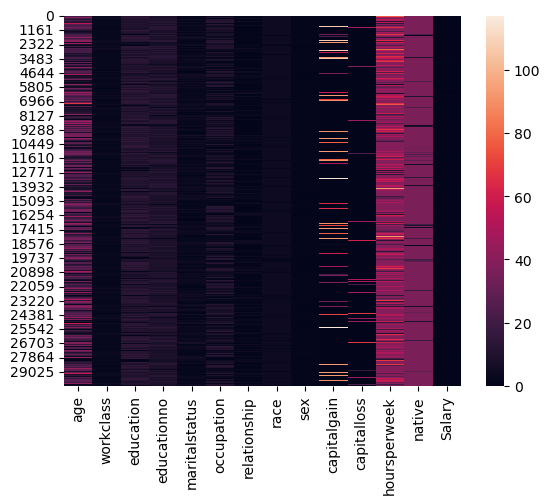

In [59]:
sns.heatmap(train)

<Axes: >

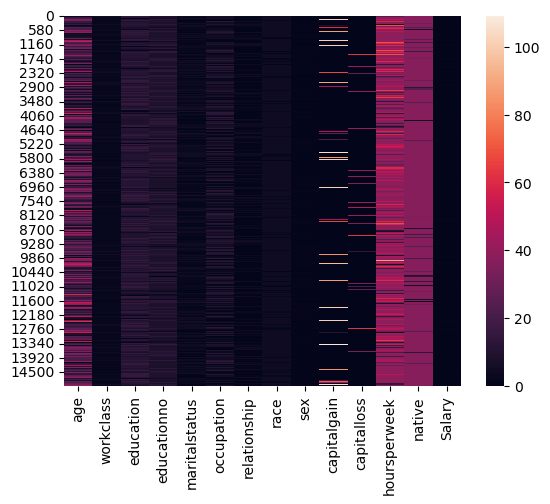

In [60]:
sns.heatmap(test)

<Axes: >

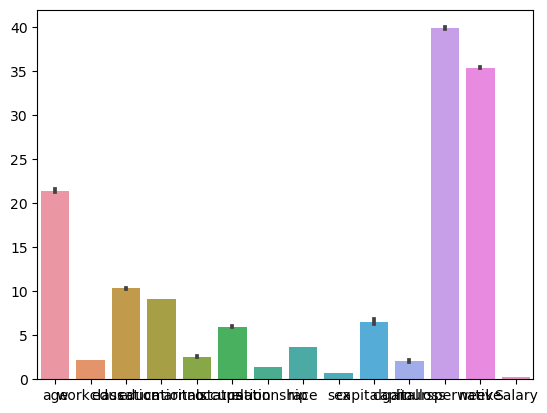

In [77]:
sns.barplot(train)

from the above charts, we could see that age, salary, hours per week are contributing more to our dataset.

In [39]:
x_train=train.iloc[:,0:13]
y_train=train.iloc[:,13]
x_test=test.iloc[:,0:13]
y_test=test.iloc[:,13]

In [40]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4


In [41]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [42]:
x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,8,2,1,6,4,6,3,2,1,0,0,39,37
1,21,2,11,8,2,4,0,4,1,0,0,49,37
2,11,1,7,11,2,10,0,4,1,0,0,39,37
3,27,2,15,9,2,6,0,2,1,87,0,39,37
4,17,2,0,5,4,7,1,4,1,0,0,29,37


In [43]:
y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

In [44]:
#Builiding a Model

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()                
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
print((model.feature_importances_)*100)

[17.62721378  4.94950888  1.61174491 12.9249953   1.0689062   8.40478899
 22.0682913   2.19982926  0.62944891 12.6420289   4.11851581  9.83709179
  1.91763597]


In [46]:
x_train=x_train[['age','educationno','occupation','relationship','capitalgain','hoursperweek']]
x_test=x_test[['age','educationno','occupation','relationship','capitalgain','hoursperweek']]
x_train

,age,educationno,occupation,relationship,capitalgain,hoursperweek
0,22,12,0,1,24,39
1,33,12,3,0,0,12
2,21,8,5,1,0,39
3,36,6,5,0,0,39
4,11,12,9,5,0,39
...,...,...,...,...,...,...
30156,10,11,12,5,0,37
30157,23,8,6,0,0,39
30158,41,8,0,4,0,39
30159,5,8,0,3,0,19


In [47]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 0.04299367,  1.12889813, -1.47902982, -0.26123312,  0.74930174,
        -0.07403746],
       [ 0.88106955,  1.12889813, -0.73453283, -0.88571218, -0.28141408,
        -2.3676496 ],
       [-0.03319505, -0.4397325 , -0.23820151, -0.26123312, -0.28141408,
        -0.07403746],
       ...,
       [ 1.49057928, -0.4397325 , -1.47902982,  1.61220404, -0.28141408,
        -0.07403746],
       [-1.25221451, -0.4397325 , -1.47902982,  0.98772499, -0.28141408,
        -1.77300941],
       [ 1.03344698, -0.4397325 , -0.73453283,  2.2366831 ,  4.31386063,
        -0.07403746]])

In [48]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [49]:
svm.score(x_train,y_train)

0.8438049136301847

In [50]:
svm.score(x_test,y_test)

0.8391766268260292

**Applying different kernels Poly, rbf, Sigmoid**

In [51]:
# Kernel = poly
model_poly_salary = SVC(kernel = "poly")
model_poly_salary.fit(x_train,y_train)

SVC(kernel='poly')

In [52]:
pred_test_poly_salary = model_poly_salary.predict(x_test)

In [53]:
np.mean(pred_test_poly_salary==y_test)


0.8289508632138114

In [54]:
# kernel = rbf
model_rbf_salary = SVC(kernel = "rbf")
model_rbf_salary.fit(x_train,y_train)

pred_test_rbf_salary = model_rbf_salary.predict(x_test)

np.mean(pred_test_rbf_salary==y_test) 


0.8391766268260292

In [55]:
#'sigmoid'
model_sig_salary = SVC(kernel = "sigmoid")
model_sig_salary.fit(x_train,y_train)

pred_test_sig_salary = model_sig_salary.predict(x_test)
np.mean(pred_test_sig_salary==y_test) 

0.7131474103585658